In [ ]:
import pandas as pd
# Load the DataFrame from the .CSV file
car_data = pd.read_csv('CarPrice.csv')

In [ ]:
# A-1) DataFrame, Info Method
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# a-2) Statistical Analysis
# Minimum
min_price = car_data['price'].min()
print(f"The minimum price is : {min_price}")

# Maximum
max_price = car_data['price'].max()
print(f"The maximum price is : {max_price}")

# Standard Deviation
std_dev = car_data['price'].std()
print(f"The standard deviation of the prices is : {std_dev:.2f}")

# Additional Statistical Analysis including the mean, the median, and the quartiles (DONE!)
price_description = car_data['price'].describe()
print(price_description)

The minimum price is : 5118.0
The maximum price is : 45400.0
The standard deviation of the prices is : 7988.85
count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


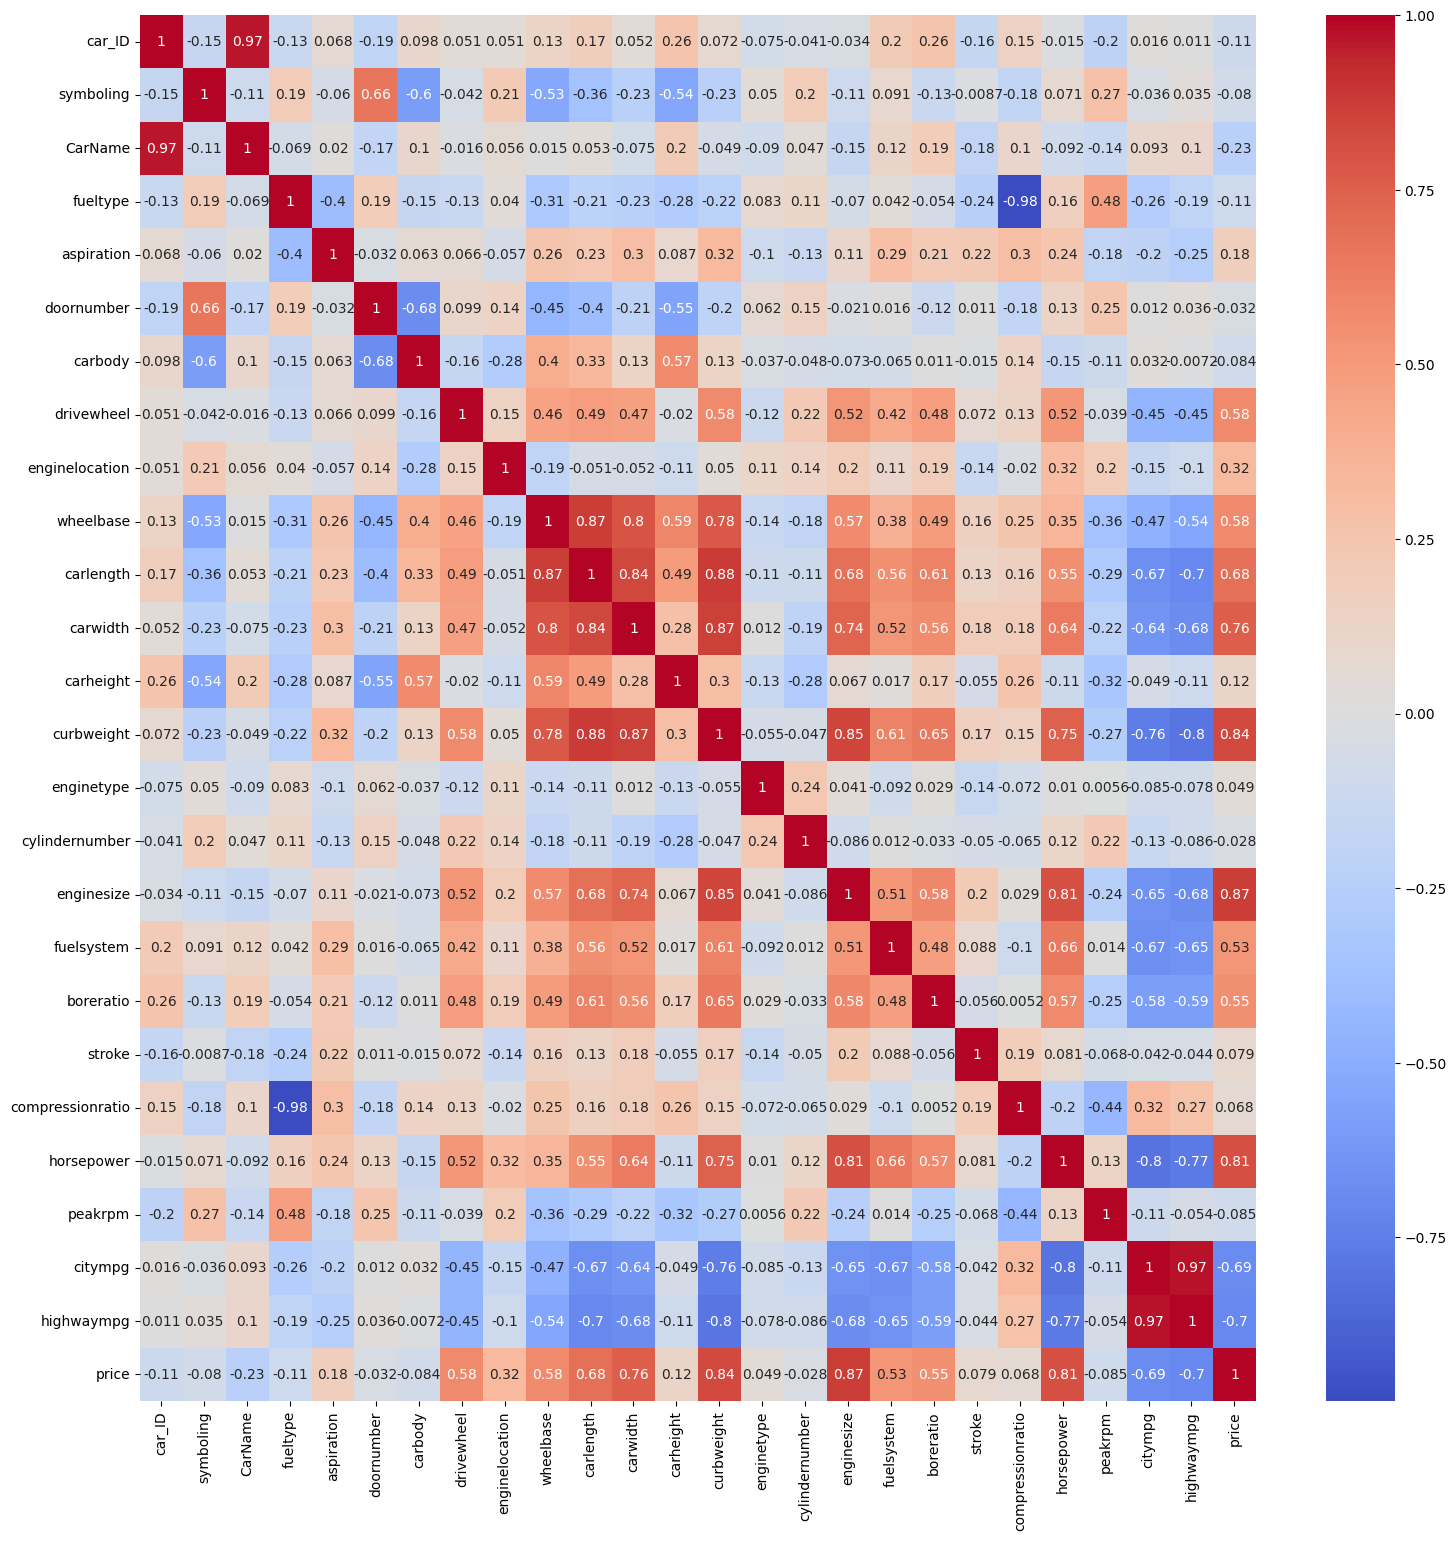

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# a-3) Correlation Matrix
# Categorical Columns which Need to be Encoded
columns_to_encode = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
                     'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
# Encoding
for column in columns_to_encode:
    car_data[column] = LabelEncoder(
    ).fit_transform(car_data[column])

# Coorelation Matrix (Selected Features Only)
corr_matrix = car_data.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 10})
plt.show()

['CarName', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'price']


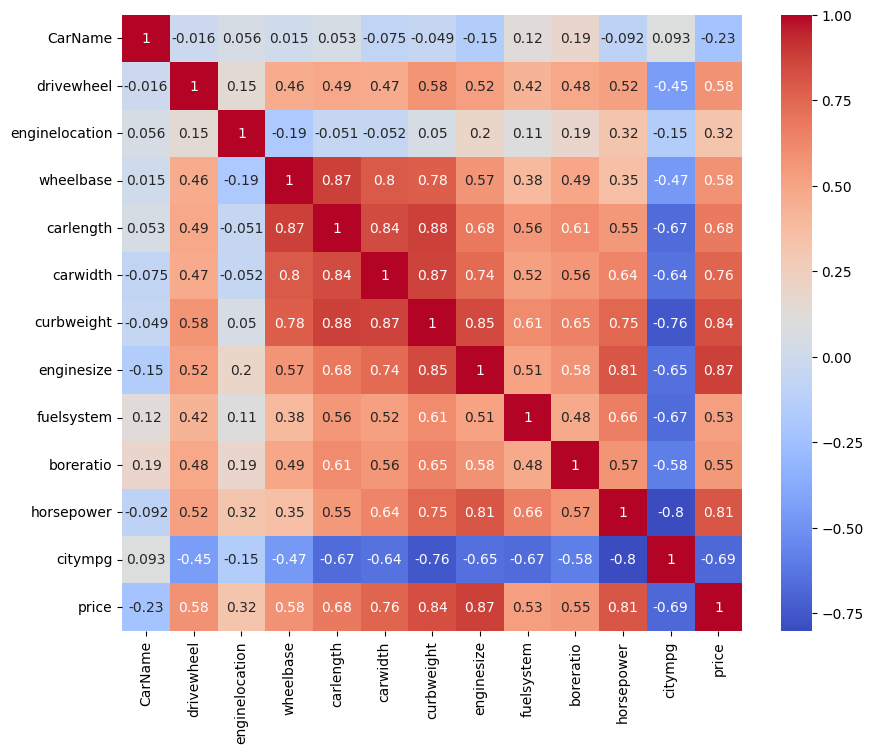

In [ ]:
# b) preprocess
# absolute values of the correlation matrix
corr_price = corr_matrix['price'].abs()
# keeping feature with corr. factors above 0.2
high_corr_features = corr_price[corr_price >= 0.2].index.tolist()
items_to_remove = 'highwaympg'  # removing colinear features
high_corr_features = [
    item for item in high_corr_features if item != items_to_remove]
print(high_corr_features)

features_corr_matrix = car_data[high_corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(features_corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# c-1) train test split
X = car_data[high_corr_features].drop('price', axis=1)
Y = car_data[high_corr_features]['price']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42)

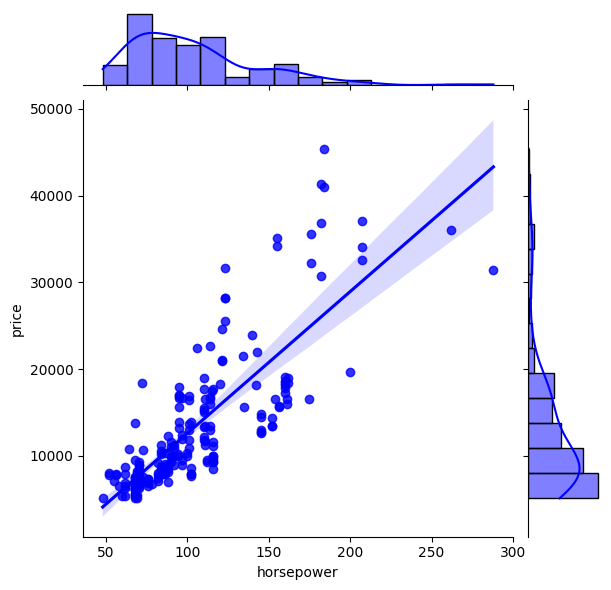

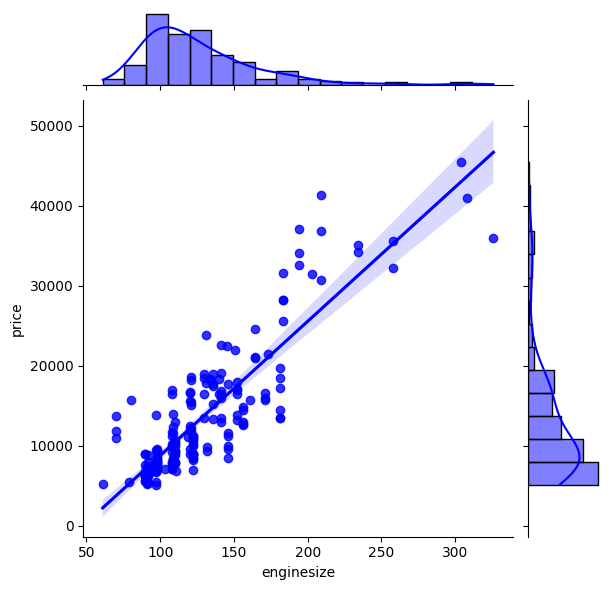

In [ ]:
# c-2) jointplot
sns.jointplot(x='horsepower', y='price',
              data=car_data[high_corr_features], kind='reg', color='b')
plt.show()
print('\n')
sns.jointplot(x='enginesize', y='price',
              data=car_data[high_corr_features], kind='reg', color='b')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
# c-3) 10 most important features
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)
mask = selector.get_support()
selected_features = X.columns[mask].tolist()
print("selected features : ", selected_features)

selected features :  ['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'citympg']


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR

# Initialize Models
linear_model = LinearRegression()
lasso_model = Lasso(alpha=1.0)
ridge_model = Ridge(alpha=1.0)
svr_model = SVR(kernel='linear')

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
# Function to train. and evaluate (RMSE and R2 score) models
def train_and_evaluate(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    r2 = r2_score(Y_test, Y_pred)
    return rmse, r2

In [ ]:
# Dictionary of models
models = {
    'Linear Regression': linear_model,
    'Lasso Regression': lasso_model,
    'Ridge Regression': ridge_model,
    'SVR': svr_model
}

In [ ]:
# Training and Evaluating
results = {}
for name, model in models.items():
    rmse, r2 = train_and_evaluate(model, X_train, X_test, Y_train, Y_test)
    results[name] = {'RMSE': rmse, 'R^2 Score': r2}

In [ ]:
# Printing Results
for model in results:
    print(
        f"{model} -> RMSE: {results[model]['RMSE']:.4f}, R^2 Score: {results[model]['R^2 Score']:.4f}")

Linear Regression -> RMSE: 3174.0167, R^2 Score: 0.8546
Lasso Regression -> RMSE: 3174.9491, R^2 Score: 0.8545
Ridge Regression -> RMSE: 3305.0799, R^2 Score: 0.8423
SVR -> RMSE: 3789.3449, R^2 Score: 0.7928
